In [20]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

In [21]:
from sklearn.datasets import fetch_california_housing  # Importing the California housing dataset from sklearn
housing = fetch_california_housing()  # Loading the California housing dataset

In [22]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)  # Creating a DataFrame with feature names as column headers
df['PRICE'] = housing.target  # Adding the target variable (house prices) as a new column

In [23]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


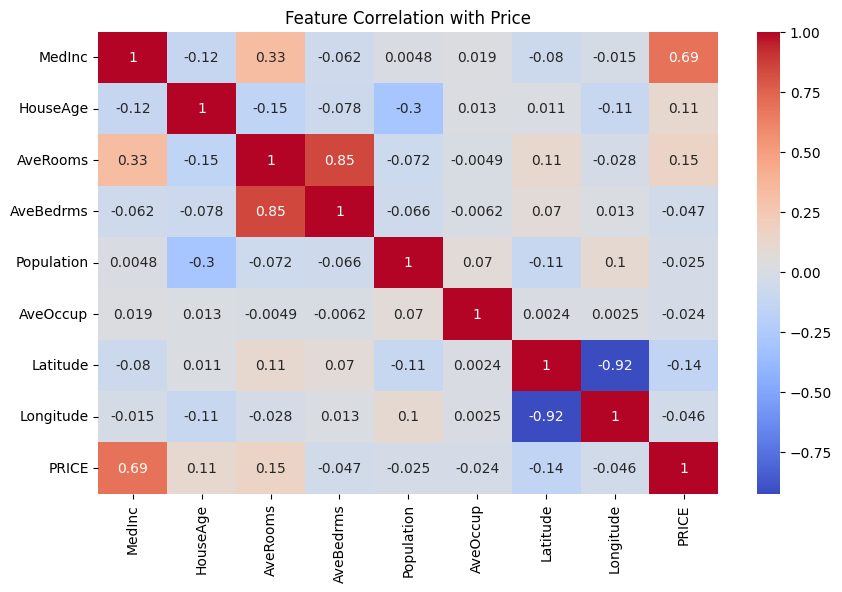

In [26]:
plt.figure(figsize=(10,6))  # Set the figure size to 10x6 inches for better visibility
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  # Generate a heatmap to visualize feature correlations
# df.corr() computes the correlation matrix for all numerical columns
# annot=True displays correlation values inside the heatmap cells
# cmap="coolwarm" sets the color map to visually distinguish positive and negative correlations
plt.title("Feature Correlation with Price")  # Add a title to the heatmap
plt.show()  # Display the heatmap

In [27]:
X = df.drop(columns=["PRICE"])  # Selecting all features except the target variable
y = df["PRICE"]  # Defining the target variable (house prices)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the dataset into training and testing sets
# test_size=0.2 → 20% of the data is reserved for testing, and 80% for training
# random_state=42 → Ensures reproducibility of results by setting a fixed random seed

In [29]:
model = LinearRegression()  # Initializing a Linear Regression model
model.fit(X_train, y_train)  # Training the model using the training data (features and target)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)  # Making predictions on the test dataset

In [31]:
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)  # Calculating R-squared (R²) score

In [32]:
print(f"Mean Squared Error: {mse:.2f}")  # Printing MSE with 2 decimal places
print(f"R-Squared Score: {r2:.2f}")  # Printing R² score with 2 decimal places

Mean Squared Error: 0.56
R-Squared Score: 0.58


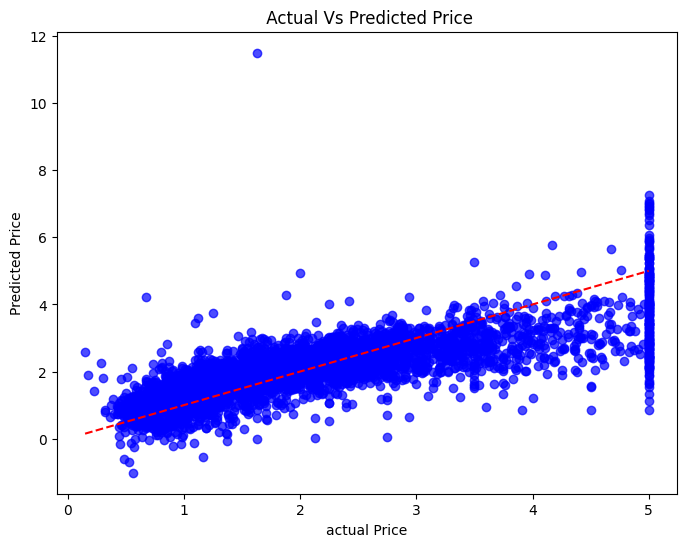

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Vs Predicted Price")
plt.show()

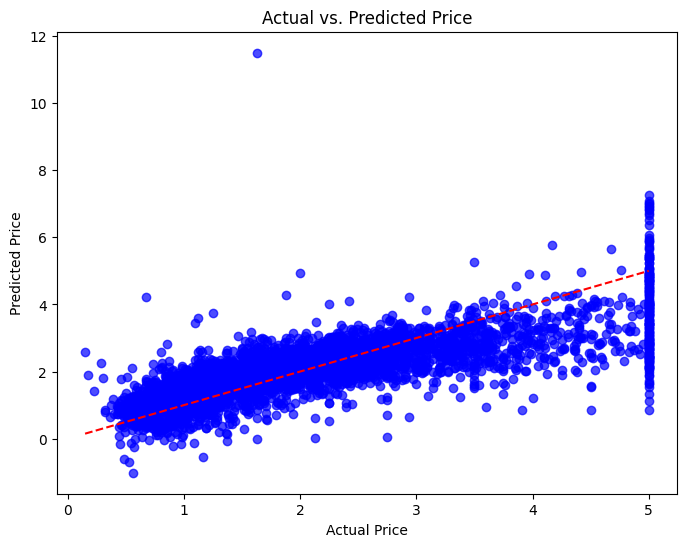

In [34]:
plt.figure(figsize=(8,6))  # Setting the figure size for better readability
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # Scatter plot of actual vs. predicted values
# alpha=0.7 makes points slightly transparent to avoid overcrowding
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='dashed')  # Diagonal reference line (Ideal predictions)
plt.xlabel("Actual Price")  # Corrected capitalization for consistency
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")  # Removed extra space for consistency
plt.show()  # Display the plot